## Project title:
# Water Quality Prediction

# Introduction

Numerous variables, including the quantity of salt (or salinity), bacteria levels, dissolved oxygen concentrations, and the amount of debris suspended in the water, are used to determine the quality of water. To assess the water quality in some bodies of water, measurements of the amount of pesticides, herbicides, heavy metals, and other contaminants may also be made.

Even though water quality is determined by scientific measurements, it is not as straightforward as saying "that water is good" or "that water is terrible." Therefore, the decision is often based on the water's intended use—is it for drinking, washing a car with, or something else?

Thus, the aim of this project is to predict the quality of water for drinking purpose. Given parameters such as pH, Hardness, Solids, Chlroamines, Sulfate, Organic_Carbon, Trihalomethaes, and Turbidity, the POTABILITY is predicted.

# Feature Description

1. pH: potential of hydrogen (of water in this case). Ranges between 0 and 14.
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic Carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

# Import Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from collections import Counter
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

filterwarnings('ignore')

# Import Data

In [115]:
df = pd.read_csv('water_POTABILITY.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [117]:
df.columns = [col.upper() for col in df.columns]

# Data Visualizations

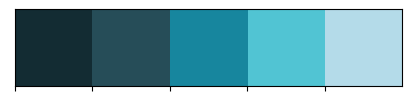

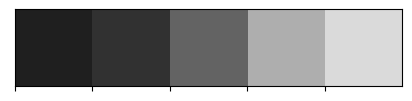

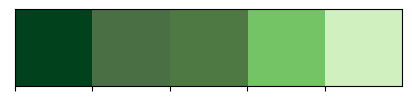

In [6]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_green)

### Potability

Potable water is defined as water that is suitable for human consumption (i.e., water that can be used for drinking or cooking). The term implies that the water is drinkable as well as safe. Drinkable water means it is free of unpleasant odors, tastes and colors, and is within reasonable limits of temperature. Safe water means it contains no toxins, carcinogens, pathogenic micro-organisms, or other health hazards.

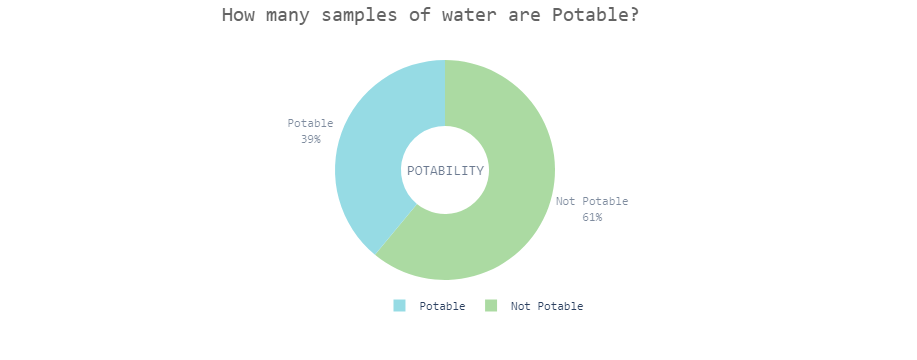

In [7]:
d= pd.DataFrame(df['POTABILITY'].value_counts())

fig = px.pie(d,values='POTABILITY',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_green[3],colors_blue[3]],
             labels={'label':'POTABILITY','POTABILITY':'No. Of Samples'})

fig.add_annotation(text='POTABILITY',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')
fig.update_layout(
    font_family='monospace',
    title=dict(text='How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label');

fig.show()

### PH 
A simple definition is that it measures how acidic or basic a solution is. Pure water has a neutral pH of 7, which indicates that it is neither acidic or basic. However, the scale ranges from 0 (very acidic) to 14 (very basic). It is normal for water to have a range of between 6.5 and 8.5 on the scale. 

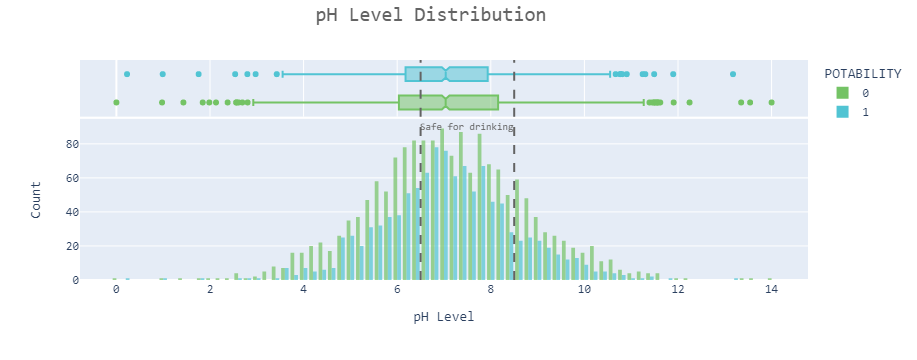

In [8]:
# plot histogram
fig = px.histogram(df, x='PH', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 

# include vertical lines
fig.add_vline(x=6.5, line_width=2, line_dash="dash", line_color=colors_dark[2])
fig.add_vline(x=8.5, line_width=2, line_dash="dash", line_color=colors_dark[2])
# fig.add_vrect(x0=6.5, x1=8.5, fillcolor=colors_blue[4], opacity=0.7, line_width=0)

# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=10)), text='Safe for drinking', x=7.5, y=90, showarrow=False)

# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='pH Level',
               yaxis_title_text='Count',
               )
fig.show()

### Hardness
In scientific terms, water hardness is generally the amount of dissolved calcium and magnesium in water. But in layman's terms, you may notice water hardness when your hands still feel slimy after washing with soap and water, or when your drinking glasses at home become less than crystal clear. It is usually measured in mg/L. General guidelines for classification of waters are: 0 to 70 mg/L (milligrams per liter) is classified as soft; 70 to 150 mg/L as moderately hard; 150 to 300 mg/L as hard; and more than 300 mg/L as very hard.

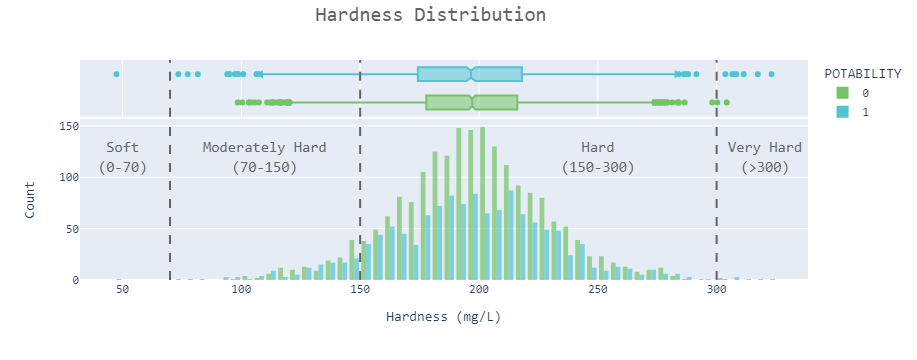

In [9]:
# plot histogram
fig = px.histogram(df, x='HARDNESS', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 

# include vertical lines
fig.add_vline(x=70, line_width=2, line_dash="dash", line_color=colors_dark[2])
fig.add_vline(x=150, line_width=2, line_dash="dash", line_color=colors_dark[2])
fig.add_vline(x=300, line_width=2, line_dash="dash", line_color=colors_dark[2])

# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Soft<br>(0-70)', x=50, y=120, showarrow=False)
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Moderately Hard<br>(70-150)', x=110, y=120, showarrow=False)
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Hard<br>(150-300)', x=250, y=120, showarrow=False)
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Very Hard<br>(>300)', x=320, y=120, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Hardness (mg/L)',
               yaxis_title_text='Count',
               )

fig.show()

### Solids 
Total dissolved solids (TDS) comprise inorganic salts (primarily calcium, magnesium, potassium, sodium, bicarbonates, chlorides and sulfates) and some small amounts of organic matter that are dissolved in water.
TDS in drinking water originate from natural sources, sewage, urban runoff, industrial wastewater, and chemicals used in the water treatment process, and the nature of the piping or hardware used to convey the water, i.e. the plumbing.  Quantityis excellent if its less than 300 ppm; good, between 300 and 600 ppm; fair, between 600 and 900 ppm; poor, between 900 and 1200 ppm; and unacceptable, greater than 1200 mg/litre. However, Water with extremely low concentrations of TDS may also be unacceptable because of its flat, insipid taste. 
It's worth noting that water with a lower TDS level is not necessarily safer or of higher quality, as some minerals and salts can be beneficial for health. However, water with a very high TDS level can have a noticeable taste and smell, and some of the dissolved substances may be harmful to health. In such cases, it may need to be treated before it is consumed.

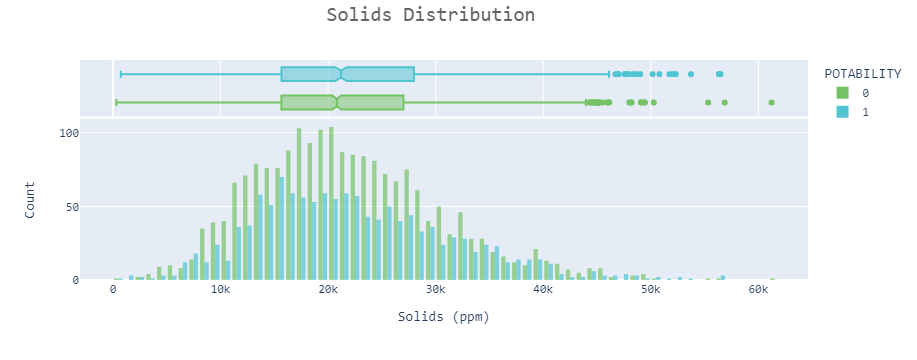

In [119]:
# plot histogram
fig = px.histogram(df, x=df['SOLIDS'], color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 

# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Solids Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Solids (ppm)',
               yaxis_title_text='Count',
               )

fig.show()

###  Chloramines
Chloramines are a type of disinfectant used to treat drinking water. They are formed by adding ammonia to chlorine, which provides a longer-lasting residual in the water distribution system. Chloramines are commonly used as a secondary disinfectant in municipal water treatment plants because they are effective at controlling bacteria, viruses, and other pathogens.
The acceptable level of chloramines in drinking water depends on the specific use and the guidelines used. According to the World Health Organization (WHO), the maximum acceptable level of chloramines in drinking water is 4 mg/L or 4 parts per million (ppm). This is a guideline value, and actual levels may vary depending on the local regulations and water treatment practices.
It's important to note that some individuals may be sensitive to high levels of chloramines, particularly people with respiratory problems, as well as fish and other aquatic animals. In such cases, it may be necessary to treat the water to remove the chloramines before use.

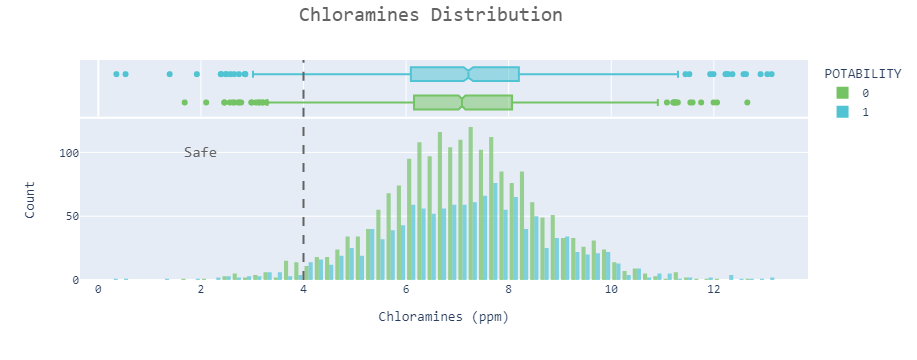

In [11]:
# plot histogram
fig = px.histogram(df, x='CHLORAMINES', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 
# include vertical lines
fig.add_vline(x=4, line_width=2, line_dash="dash", line_color=colors_dark[2])
# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Safe', x=2, y=100, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Chloramines (ppm)',
               yaxis_title_text='Count',
               )
fig.show()

###  Sulfate
Sulfate is a naturally occurring anion that can be found in water sources such as rivers, lakes, and groundwater. It is often present in water due to the dissolution of minerals such as gypsum, alunite, and epsomite.
The acceptable level of sulfate in drinking water can vary depending on the source and guidelines used. Sulfate levels in drinking water should not exceed 250 milligrams per liter (mg/L).
High levels of sulfate in water can cause digestive problems for some people, leading to symptoms such as diarrhea and abdominal discomfort. In addition, water with high sulfate levels can have a bitter or medicinal taste.

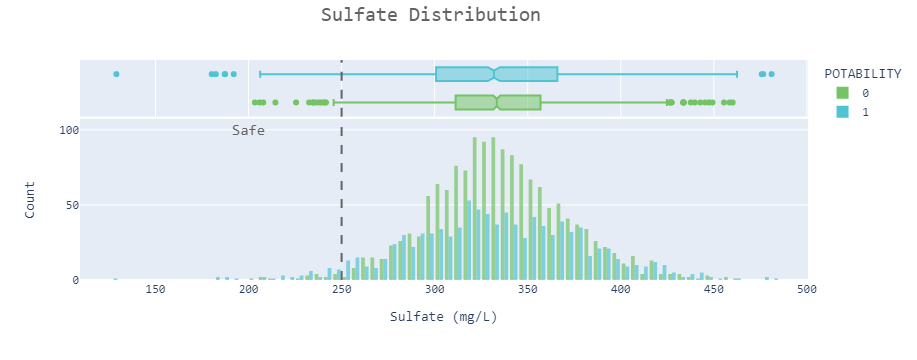

In [12]:
# plot histogram
fig = px.histogram(df, x='SULFATE', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 
# include vertical lines
fig.add_vline(x=250, line_width=2, line_dash="dash", line_color=colors_dark[2])
# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Safe', x=200, y=100, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Sulfate (mg/L)',
               yaxis_title_text='Count',
               )
fig.show()

###  Conductivity
Conductivity is a measure of the ability of water to conduct an electrical current, and is often used as an indirect measure of the total dissolved solids (TDS) in water. The conductivity of water depends on the concentration of ions (such as salts, minerals, and acids) dissolved in the water, and is commonly measured in microsiemens per centimeter (µS/cm).
The acceptable level of conductivity in drinking water can vary depending on the source and guidelines used. However, the World Health Organization (WHO) recommends that the conductivity of drinking water should not exceed 2,000 microsiemens per centimeter (µS/cm).

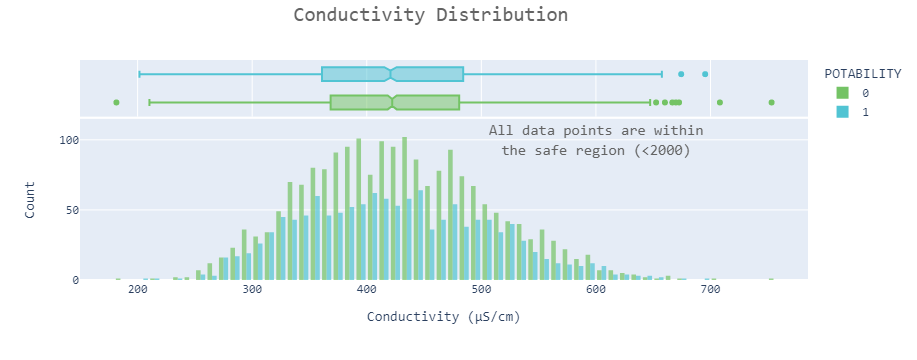

In [13]:
# plot histogram
fig = px.histogram(df, x='CONDUCTIVITY', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 

# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='All data points are within<br>the safe region (<2000)', 
                   x=600, y=100, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Conductivity (µS/cm)',
               yaxis_title_text='Count',
               )
fig.show()

###  Organic Carbon
Organic carbon in water refers to the presence of organic compounds and substances, such as sugars, starches, cellulose, and other complex carbon-based molecules, that are dissolved or suspended in water. Organic carbon can come from a variety of sources, including natural processes such as plant and animal decay, and human activities such as wastewater discharge and agricultural runoff.

The acceptable level of organic carbon in water can vary depending on the intended use of the water and the regulations that apply. In general, the World Health Organization (WHO) recommends that drinking water should have no more than 10 mg/L of total organic carbon (TOC) to ensure that it is safe and palatable. 

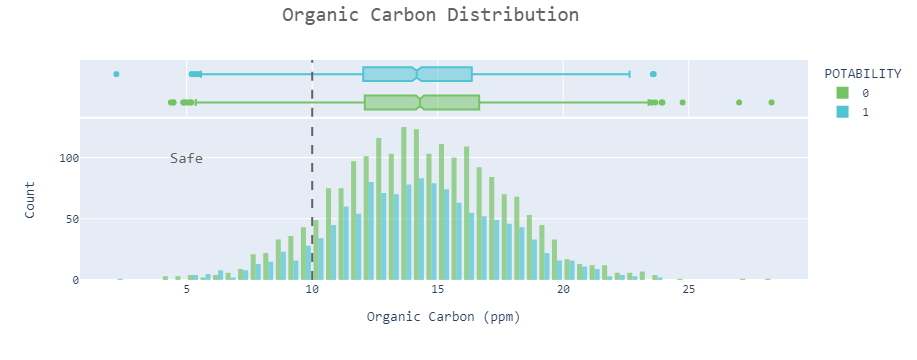

In [14]:
# plot histogram
fig = px.histogram(df, x='ORGANIC_CARBON', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 
# include vertical lines
fig.add_vline(x=10, line_width=2, line_dash="dash", line_color=colors_dark[2])
# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Safe', x=5, y=100, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Organic Carbon (ppm)',
               yaxis_title_text='Count',
               )
fig.show()

### Trihalomethanes
Trihalomethanes (THMs) are a group of chemical compounds that are formed when chlorine or other disinfectants used to treat drinking water react with naturally occurring organic matter in the water. The most common THMs in drinking water are chloroform, bromodichloromethane, dibromochloromethane, and bromoform.

The acceptable level of THMs in drinking water is regulated by various national and international organizations. For example, in the United States, the Environmental Protection Agency (EPA) has established a maximum contaminant level (MCL) for total THMs of 80 micrograms per liter (µg/L) in drinking water. 

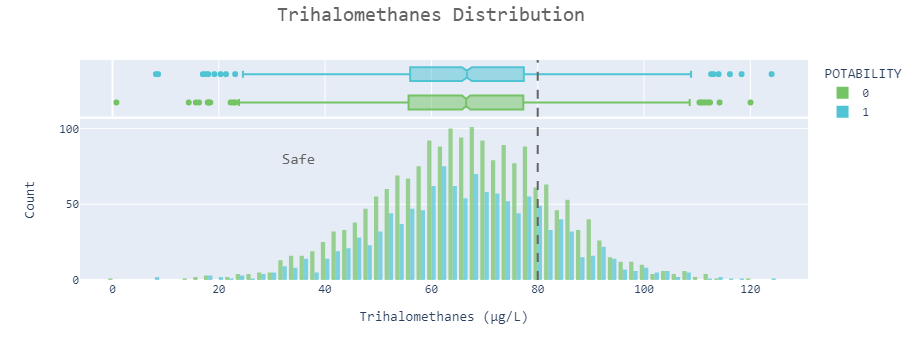

In [15]:
# plot histogram
fig = px.histogram(df, x='TRIHALOMETHANES', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 
# include vertical lines
fig.add_vline(x=80, line_width=2, line_dash="dash", line_color=colors_dark[2])
# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Safe', x=35, y=80, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Trihalomethanes (µg/L)',
               yaxis_title_text='Count',
               )
fig.show()

### Turbidity
Turbidity refers to the cloudiness or haziness of water caused by the presence of suspended particles, such as clay, silt, algae, or other organic matter. Turbidity can reduce the amount of light that passes through the water and can affect its color, taste, and odor.

The acceptable level of turbidity in drinking water is 5 NTU. However, levels below 1 NTU is most ideal.

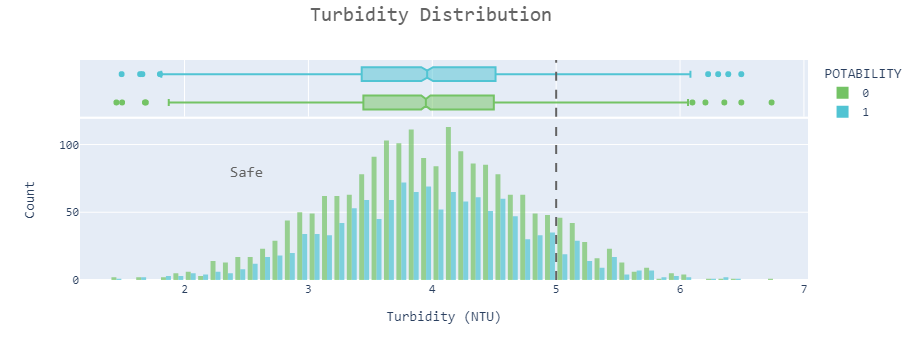

In [16]:
# plot histogram
fig = px.histogram(df, x='TURBIDITY', color="POTABILITY", color_discrete_sequence=[colors_green[3], colors_blue[3]],
                   marginal="box", nbins=100, opacity=0.7, barmode='group') 
# include vertical lines
fig.add_vline(x=5, line_width=2, line_dash="dash", line_color=colors_dark[2])
# include in-chart texts
fig.add_annotation(dict(font=dict(color=colors_dark[2],size=15)), text='Safe', x=2.5, y=80, showarrow=False)
# include title, xaxis and yaxis labels
fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
               xaxis_title_text='Turbidity (NTU)',
               yaxis_title_text='Count',
               )
fig.show()

## Scatter Plot 

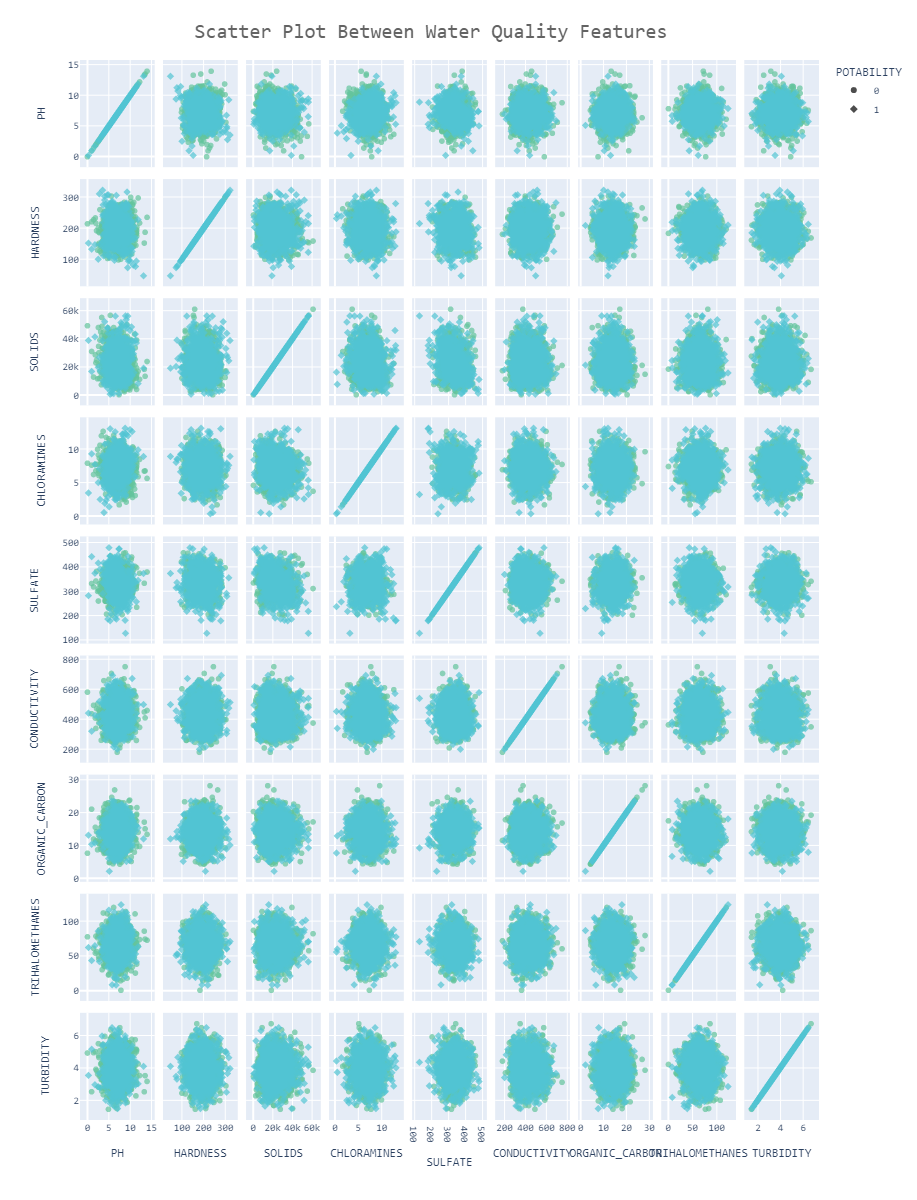

In [17]:
fig = px.scatter_matrix(df, df.drop('POTABILITY', axis=1), color='POTABILITY', symbol='POTABILITY',
                        color_discrete_sequence=[colors_green[3], colors_blue[3]], opacity=0.7,
                        width=1200, height=1200, color_continuous_scale=[colors_green[3], colors_blue[3]])
fig.update_coloraxes(showscale=False)
fig.update_layout(
    font_family='monospace',
    title=dict(text='Scatter Plot Between Water Quality Features',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    font_size=10
               )
fig.show()

There is no significant correlation between the features. Let's confirm this using a heatmap.

## Heatmap 

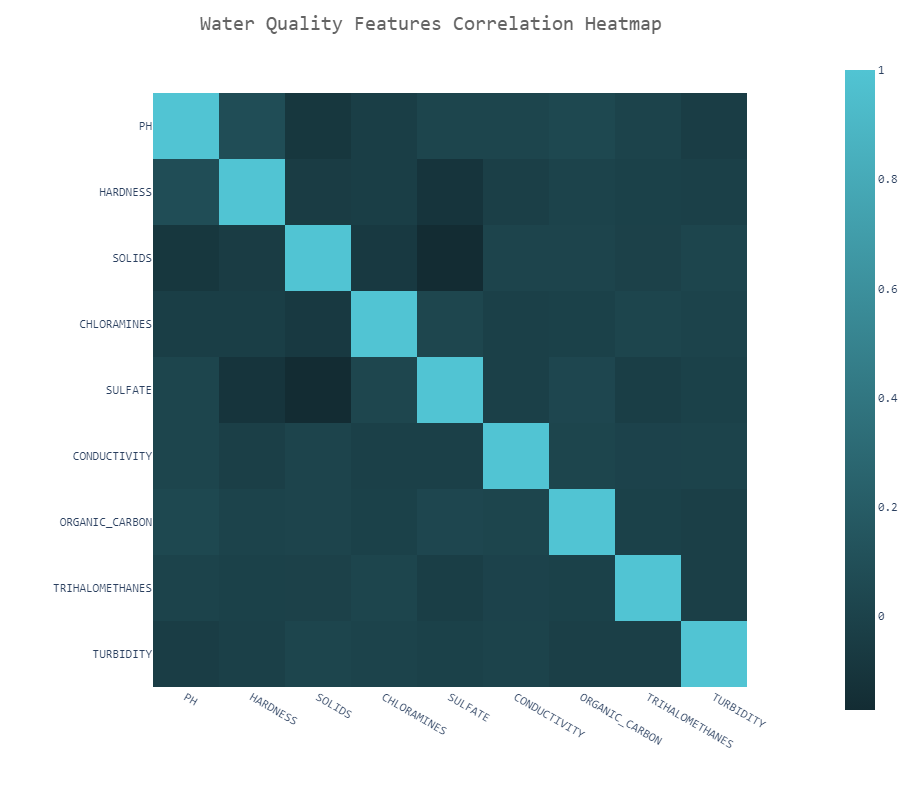

In [18]:
# Create heatmap
fig = px.imshow(df.drop('POTABILITY', axis=1).corr(), color_continuous_scale=[colors_blue[0], colors_blue[3]])

fig.update_layout(
    font_family='monospace',
    title=dict(text='Water Quality Features Correlation Heatmap',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    width=800,
    height=800
    # font_size=10
               )
# Show plot
fig.show()

# Data Cleaning

### Fill Null Values 


The columns that have null values are pH, Sulfate, and Trihalomethanes. 

In [19]:
df.isna().sum()

PH                 491
HARDNESS             0
SOLIDS               0
CHLORAMINES          0
SULFATE            781
CONDUCTIVITY         0
ORGANIC_CARBON       0
TRIHALOMETHANES    162
TURBIDITY            0
POTABILITY           0
dtype: int64

<AxesSubplot:>

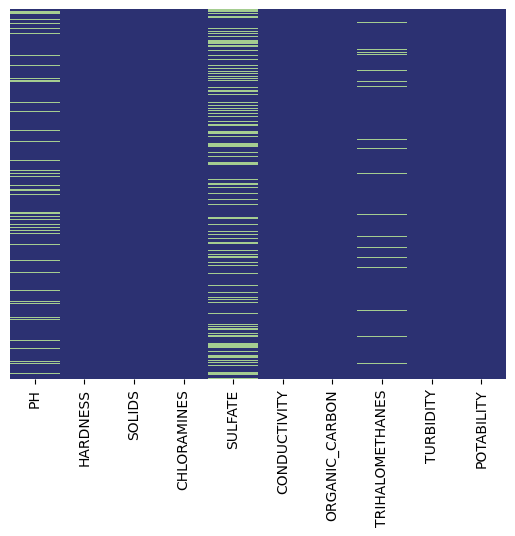

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='crest_r')

In [20]:
# subset data according to potability
df[df['POTABILITY']==1].describe()

PH     HARDNESS        SOLIDS  CHLORAMINES     SULFATE  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       CONDUCTIVITY  ORGANIC_CARBON  TRIHALOMETHANES    TURBIDITY  POTABILITY  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [21]:
df[df['POTABILITY']==0].describe()

PH     HARDNESS        SOLIDS  CHLORAMINES      SULFATE  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       CONDUCTIVITY  ORGANIC_CARBON  TRIHALOMETHANES    TURBIDITY  POTABILITY  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

Based on the distributions plotted earlier, the data for the columns with null values is not skewed so we can use the mean to fill the null values. There is no significant difference between the mean values for the columns with null values when the water is potable and when it is not potable. Thus, we can fill with the general mean value.

In [28]:
null_cols = ['PH', 'SULFATE', 'TRIHALOMETHANES']
for col in null_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Split Dataset

In [52]:
# split dataset into features and label
X = df.drop('POTABILITY', axis=1)
y = df['POTABILITY']

In [53]:
# split dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Data Scaling

In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## Baseline Model

We will employ multiple ml models and choose the top performers for hyperparameter tuning. The choice metric for this project will be the precision score as we want to focus on correctly predicting the cases where the water is truely potable. 

In [70]:
models = [('LR', LogisticRegression(max_iter=1000)), ('SVC', SVC()), ('KNN', KNeighborsClassifier(n_neighbors=10)),
         ('DTC', DecisionTreeClassifier()), ('GNB', GaussianNB()), ('RFC', RandomForestClassifier()),
         ('GBC', GradientBoostingClassifier()), ('ABC', AdaBoostClassifier(base_estimator=RandomForestClassifier())),
         ('XGB', XGBClassifier(learning_rate=0.001)), ('LGBM', LGBMClassifier())]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = precision_score(y_test, y_pred)
    results.append((name, score))
results.sort(key=lambda a:a[1], reverse=True)

In [71]:
results

[('SVC', 0.7157894736842105),
 ('XGB', 0.6702127659574468),
 ('ABC', 0.6602564102564102),
 ('GBC', 0.6507936507936508),
 ('RFC', 0.6226415094339622),
 ('LGBM', 0.6161616161616161),
 ('KNN', 0.543859649122807),
 ('GNB', 0.4888888888888889),
 ('DTC', 0.4634146341463415),
 ('LR', 0.0)]

## Hyper Parameter Tuning

In [77]:
# SVC, 'XGB', 'ABC', 'GBC', 'RFC', 'LGBM'
parameters = {
    'SVC':{
        'model':SVC(),
        'params':{
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ["rbf"]
        }
    },
    
    'XGB':{
        'model':XGBClassifier(),
        'params':{
            'learning_rate': [0.1, 0.01, 0.001, 0.0001],
            'max_depth': list(range(2,12)),
            'min_child_weight': list(range(5,10))
        }
    },
    
    'ABC':
    {
        'model':AdaBoostClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'learning_rate':[0.1, 0.01, 0.001, 0.0001],
            'base_estimator':[RandomForestClassifier(), SVC()]
        }
    },
    
    'GBC':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    
    'LGBM':
    {
        'model':LGBMClassifier(),
        'params':
        {
            'num_leaves':list(range(11)),
            'max_depth':list(range(11))
        }
    },
}

In [86]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in parameters.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20, scoring='precision')
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    rs.fit(X_scaled,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Model                                         Parameters     Score
0            SVC              {'kernel': 'rbf', 'gamma': 1, 'C': 1}  0.860561
1            XGB  {'min_child_weight': 7, 'max_depth': 4, 'learn...  0.660306
2            ABC  {'n_estimators': 50, 'learning_rate': 0.1, 'ba...  0.652935
3            GBC  {'n_estimators': 500, 'max_features': 'log2', ...  0.893167
4  Random Forest  {'n_estimators': 50, 'max_features': 'sqrt', '...  0.760111
5           LGBM                 {'num_leaves': 4, 'max_depth': 10}  0.642309

In [87]:
data.sort_values('Score', ascending=False)

Model                                         Parameters     Score
3            GBC  {'n_estimators': 500, 'max_features': 'log2', ...  0.893167
0            SVC              {'kernel': 'rbf', 'gamma': 1, 'C': 1}  0.860561
4  Random Forest  {'n_estimators': 50, 'max_features': 'sqrt', '...  0.760111
1            XGB  {'min_child_weight': 7, 'max_depth': 4, 'learn...  0.660306
2            ABC  {'n_estimators': 50, 'learning_rate': 0.1, 'ba...  0.652935
5           LGBM                 {'num_leaves': 4, 'max_depth': 10}  0.642309

The top two performing models are the GradientBoostingClassifier and the SVC

## Final Model 


To further improve the model, we use the voting classifier. A voting classifier is an ensemble learning method in machine learning where multiple models are combined to make predictions. The idea behind a voting classifier is to combine the predictions of several models and make a final prediction by selecting the most frequent class prediction among the models.The main advantage of using a voting classifier is that it can improve the accuracy of predictions by combining the strengths of different models. 

For this project, we will use the top two models based on precision score i.e. Gradient Boosting Classifier and Support Vector Classifier.

In [105]:
param=data['Parameters']
model = VotingClassifier(estimators=[
                                     ('GBC',GradientBoostingClassifier(**param[3])),
                                     ('SVC',SVC(**param[0])),
                                    ],voting='hard')


precision=[]
scaler = MinMaxScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=precision_score(y_test,y_pred)
    precision.append(score)   

In [107]:
print(f'The mean precision is {np.mean(precision)}')

The mean precision is 0.9149567099567101


# Summary

1. The dataset contains 39% potable water.
2. About 56% of the dataset is within the safe pH zone for potable water.
3. About 92% of the dataset is described as hard.
4. The TDS levels seem to contain some descripancy since its values are on an average 40 folds more than the upper limit for safe drinking water.
5. Only 2.7% of the data points are within the safe chloramine level.
6. Only 1.8% of the data points are within the safe sulfate level.
7. All data points are within the safe conductivity level
8. About 9.4% of the dataset is within the safe organic carbon level
9. About 77% of the dataset is within the safe trihalomethane level
10. About 90% of the dataset is within the safe turbidity level
11. The features are not strongly correlated to one another.
12. The top two performing models are the gradient boosting classifier and the support vector classifier.
13. The ensemble method of using the Voting Classfier on Stratified K-folded samples gave a precision of >90%

The model was able to predict the potability of water with a high precision score as this the metric of interest. However, it is worthy to note that recall score will be quite low.